In [62]:
import numpy as np
from matplotlib import pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [58]:
t = np.linspace(0, 1, 11)
x = np.linspace(0, 1, 11)


p = 5

n_t, n_x = len(t), len(x)


def U(t, x = 0.5):
    return 2 * (x**4) - 3 * (t**3) + 3*(t**2)*x - 2*np.exp(x)

def f(x, t, a = 0.024): 
    return -9 * (t**2) + 6*t*x - a*(24*(x**2) - 2*np.exp(x))


def bw_euler(x, t, a = 0.024):
    dx, dt = 1/(len(x)-1), 1/(len(t)-1)

    mu = ((-a)*dt)/(dx*dx)
    
    u0 = 2*(x**4) - 2*np.exp(x)
    b1 = -3*(t**3) - 2
    b2  = 2 - 3*(t**3) + 3*(t**2) - 2*np.exp(1)

    A = np.zeros((n_t, n_t))
    A[0][0], A[-1][-1] = 1, 1
    for i in range(1, n_t-1):
        A[i][i-1], A[i][i], A[i][i+1] = mu, (1 - 2*mu), mu
    
   
    u_ = np.zeros((n_t, n_x))
    u_[0] = u0
    
    v  = np.zeros(n_t) 
    

    for i in range(1, n_t):
        v[0], v[-1] = b1[i], b2[i]
        v[1:-1] = (dt * f(x[1:-1], np.array([t[i]for k in range((n_t-2))]))) + u_[i-1][1:-1]
        u_[i] = np.linalg.solve(A,v)

        
   
    return u_





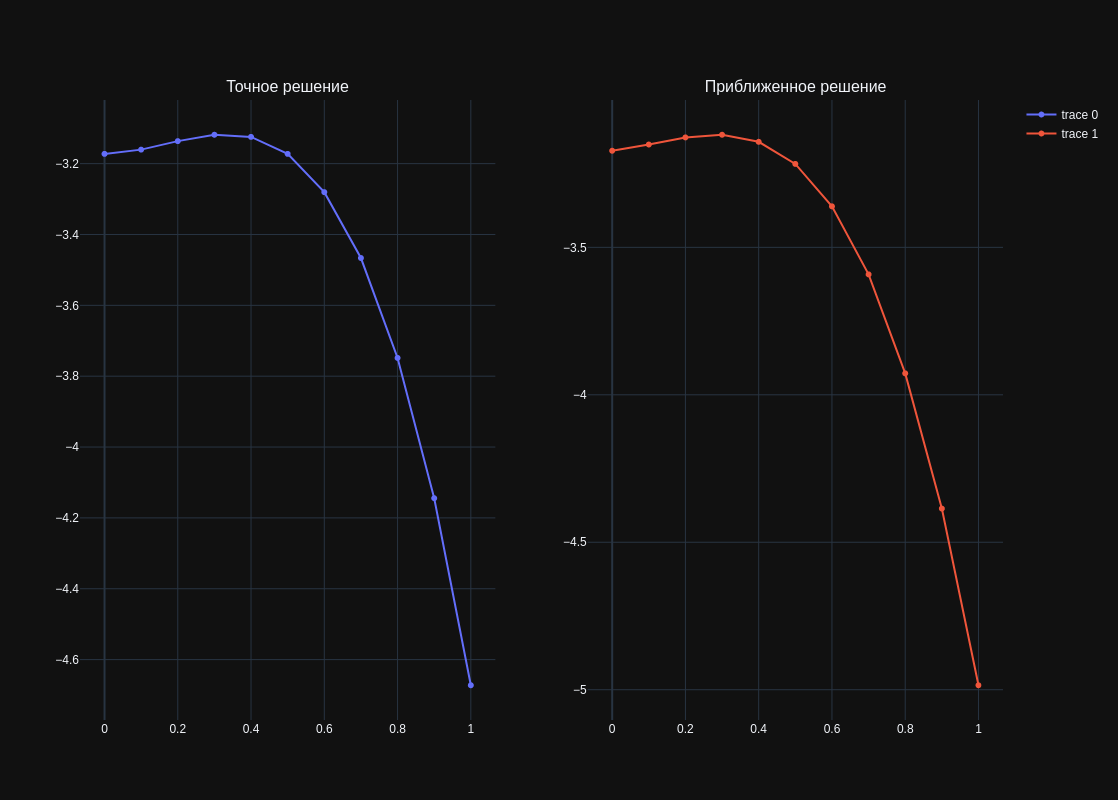

In [76]:
# fig, axs = plt.subplots(ncols = 2, nrows = 1)

# X, Y = np.meshgrid(t, x)
# y1 = bw_euler(x,t)



# z = [y1[i][p] for i in range(n_t)]
# axs[0].plot(t, U(t))
# axs[0].set_title(f"Точное решение x= 0.{p}")

# axs[1].plot(t, z, "#F11A7B")
# axs[1].set_title(f"Приблеженное решение x= 0.{p}")
# #axs[1].plot_surface(x, t, bw_euler(x,t))

# fig.tight_layout()
# plt.show()

fig = make_subplots(
    rows=1, cols=2,
   subplot_titles = [ "Точное решение", "Приближенное решение"])

fig.add_trace(
    go.Scatter(x=t, y=U(t)),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=t, y=z),
    row=1, col=2)

fig.update_layout(
    #scene = dict(aspectmode='cube'),
    height=800,
    #width=800
    
    
)
fig.show()


    

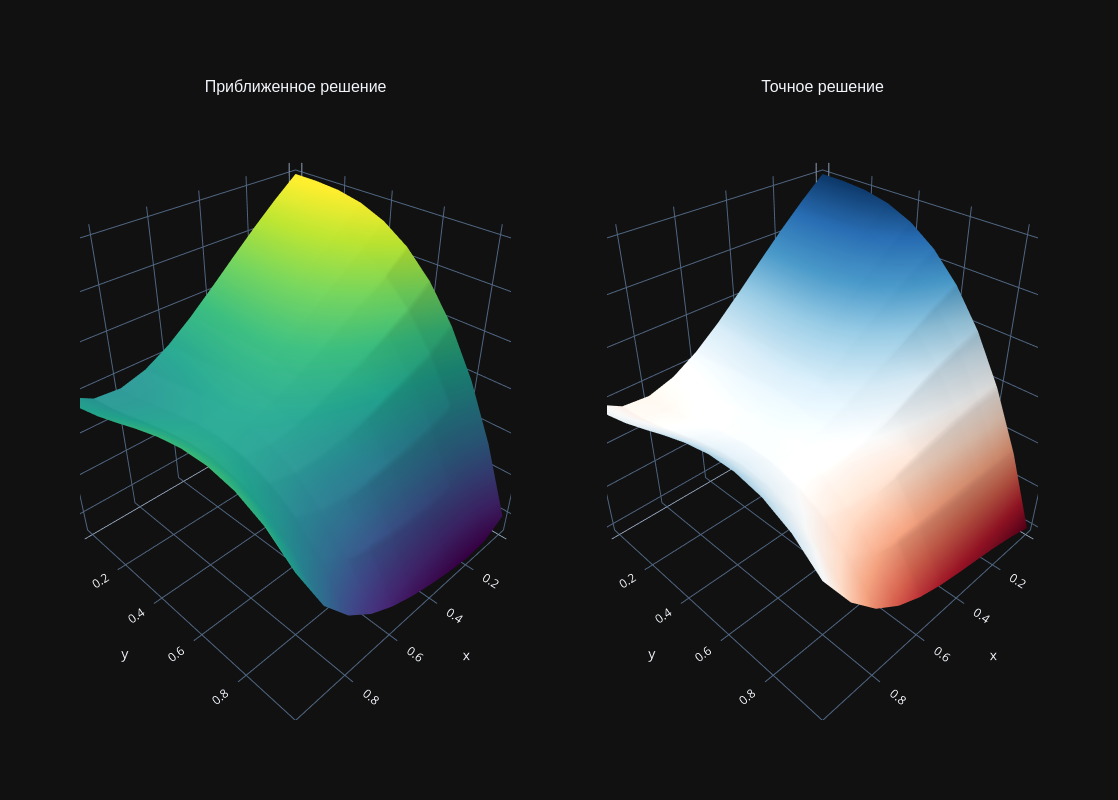

In [63]:
X, Y = np.meshgrid(x, t)
y1 = bw_euler(x,t)

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}]], subplot_titles = ["Приближенное решение", "Точное решение"])
    

fig.add_trace(
    go.Surface(x=X, y=Y, z=y1, colorscale='Viridis', showscale=False),
    row=1, col=1)

fig.add_trace(
    go.Surface(x=X, y=Y, z=U(Y,X), colorscale='RdBu', showscale=False),
    row=1, col=2)



fig.update_layout(
    #scene = dict(aspectmode='cube'),
    height=800,
    #width=800
    
    
)
fig.for_each_scene(lambda x: x.update({'aspectmode': 'cube'}))

fig.show()

10 9 8 7 6 5 4 3 2 1


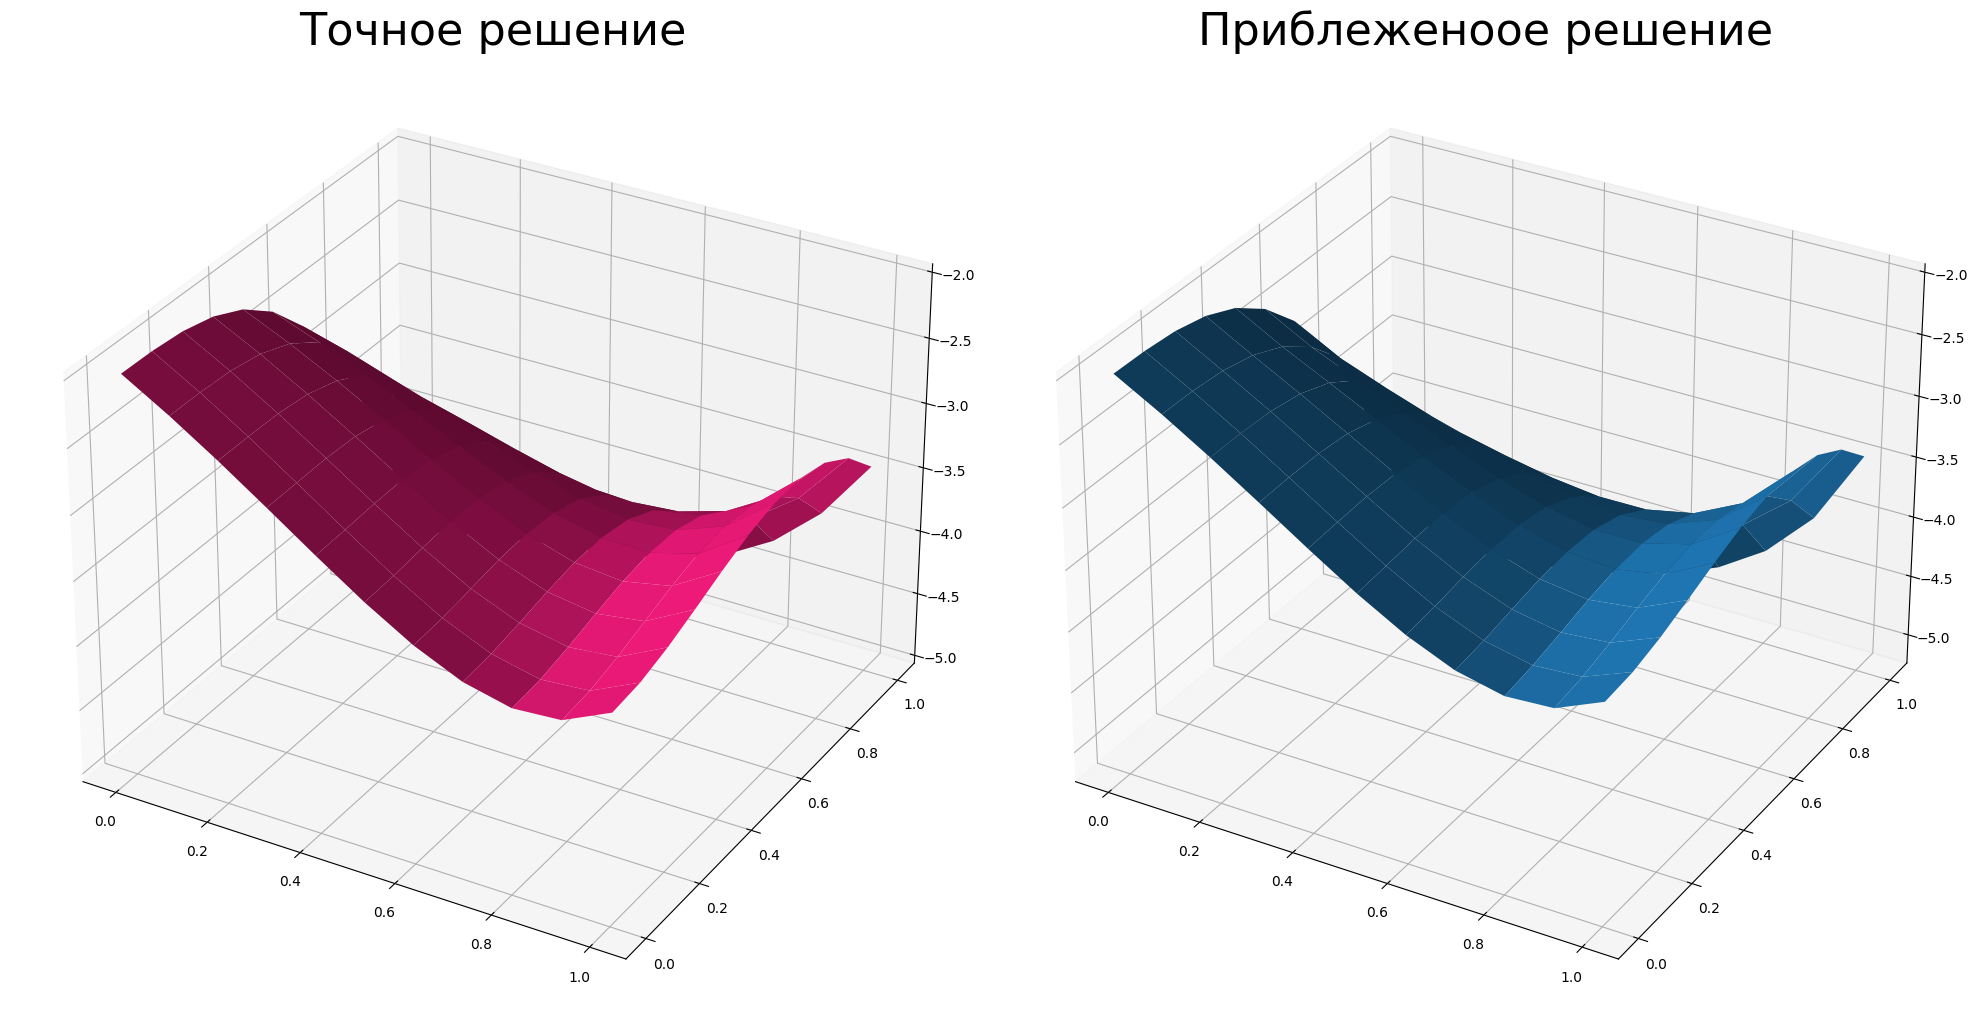

In [77]:
fig, axs = plt.subplots(ncols = 2, nrows = 1, subplot_kw={"projection": "3d"})

fig.set_figheight(20)
fig.set_figwidth(20)




axs[0].plot_surface(X, Y, U(Y, X), color="#F11A7B")
axs[0].set_title("Точное решение", fontsize = 32)

axs[1].plot_surface(X, Y, y1)
axs[1].set_title("Приблеженоое решение", fontsize = 32)

fig.savefig("fig.png")
fig.tight_layout()
plt.show()